# Homework 3: Three-Body Problem (20 points)

Group Members: Julius Franke (el442, juliusttf@gmail.com), Erik Meister (kd400, erik.meister@me.com), Eugen Dizer (qo452, eugen9898@web.de)

Due on Friday, 15.05.2020.

In [1]:
#Load standard libraries
import numpy as np   
import matplotlib.pyplot as plt   
%matplotlib inline

## $4^{th}$ Order Runge-Kutta Method (RK4)

In [2]:
def rk4_step(y0, x0, f, h):
    ''' Simple python implementation for one RK4 step. 
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
        Output:
            yp1 - M x 1 numpy array of variables at time step x0 + h
            xp1 - time step x0+h
    '''
    k1 = h * f(y0)
    k2 = h * f(y0 + k1/2)
    k3 = h * f(y0 + k2/2)
    k4 = h * f(y0 + k3)
    
    xp1 = x0 + h
    yp1 = y0 + 1/6*(k1 + 2*k2 + 2*k3 + k4)
    
    return(yp1,xp1)

def rk4(y0, x0, f, h, n):
    ''' Simple implementation of RK4
        Inputs:
            y_0    - M x 1 numpy array specifying all variables of the ODE at the current time step
            x_0    - current time step
            f      - function that calculates the derivates of all variables of the ODE
            h      - time step size
            n      - number of steps
        Output:
            yn - N+1 x M numpy array with the results of the integration for every time step (includes y0)
            xn - N+1 x 1 numpy array with the time step value (includes start x0)
    '''
    yn = np.zeros((n+1, y0.shape[0]))
    xn = np.zeros(n+1)
    yn[0,:] = y0
    xn[0] = x0
    
    for n in np.arange(1,n+1,1):
        yn[n,:], xn[n] = rk4_step(y0 = yn[n-1,:], x0 = xn[n-1], f = f, h = h)
        
    return(yn, xn)

# Be advised that the integration can take a while for large values of n (e.g >=10^5).

## Introduction: The Three-Body Problem

The gravitational three-body problem is described by the Newtonian equations of motion:

\begin{align}
\ddot{\mathbf{r}}_1 &= - G m_2 \frac{\mathbf{r}_1 - \mathbf{r}_2}{\left\vert \mathbf{r}_1 - \mathbf{r}_2 \right\vert^3} - G m_3 \frac{\mathbf{r}_1 - \mathbf{r}_3}{\left\vert \mathbf{r}_1 - \mathbf{r}_3 \right\vert^3} , \\
\ddot{\mathbf{r}}_2 &= - G m_3 \frac{\mathbf{r}_2 - \mathbf{r}_3}{\left\vert \mathbf{r}_2 - \mathbf{r}_3 \right\vert^3} - G m_1 \frac{\mathbf{r}_2 - \mathbf{r}_1}{\left\vert \mathbf{r}_2 - \mathbf{r}_1 \right\vert^3} , \\
\ddot{\mathbf{r}}_3 &= - G m_1 \frac{\mathbf{r}_3 - \mathbf{r}_1}{\left\vert \mathbf{r}_3 - \mathbf{r}_1 \right\vert^3} - G m_2 \frac{\mathbf{r}_3 - \mathbf{r}_2}{\left\vert \mathbf{r}_3 - \mathbf{r}_2 \right\vert^3} ,
\end{align}

where $\mathbf{r}_i = (x_i, y_i)$ is the position vector of the masses $m_i$. To apply the Runge-Kutta Method to solve this system, we transform it to six first order ODEs.

### a) In a first step, set the masses of all three bodies to $m_1 = m_2 = m_3 = 1$ and select the following initial conditions for $y(0)$:

\begin{align}
(y_1, y_2) &= (-0.97000436, 0.24308753) \\
(y_3, y_4) &= (-0.46620368, -0.43236573) \\
(y_5, y_6) &= (0.97000436, -0.24308753) \\
(y_7, y_8) &= (-0.46620368, -0.43236573) \\
(y_9, y_{10}) &= (0.0, 0.0) \\
(y_{11}, y_{12}) &= (0.93240737, 0.86473146)
\end{align}

### Here, $y_{1+4i}$ and $y_{2+4i}$ are the initial coordinates and $y_{3+4i}$ and $y_{4+4i}$ the initial velocities for the objects $i = 0, 1$ and $2$. Try to integrate with a step size $h$ between 0.01 and 0.001 and plot the result.

In [3]:
G = 1
m1 = 1
m2 = 1
m3 = 1

#Initial conditions
y1 = [-0.97000436, 0.24308753]
v1 = [-0.46620368, -0.43236573]
y2 = [0.97000436, -0.24308753]
v2 = [-0.46620368, -0.43236573]
y3 = [0.0, 0.0]
v3 = [0.93240737, 0.86473146]

y0 = np.array(y1 + v1 + y2 + v2 + y3 + v3)

#Define norm of a 2-vector
def norm_of_vector(x):
    return np.sqrt(x[0]**2 + x[1]**2)

#Define derivatives of all variables, when getting the M x 1 array of all variables y
def derivative_of_y1(y):
    v1 = y[2:4]
    return list(v1)

def derivative_of_v1(y):
    y1 = y[0:2]
    y2 = y[4:6]
    y3 = y[8:10]
    return list(-G*m2*(y1 - y2)/norm_of_vector(y1-y2)**3 - G*m3*(y1 - y3)/norm_of_vector(y1-y3)**3)

def derivative_of_y2(y):
    v2 = y[6:8]
    return list(v2)

def derivative_of_v2(y):
    y1 = y[0:2]
    y2 = y[4:6]
    y3 = y[8:10]
    return list(-G*m3*(y2 - y3)/norm_of_vector(y2-y3)**3 - G*m1*(y2 - y1)/norm_of_vector(y2-y1)**3)

def derivative_of_y3(y):
    v3 = y[10:12]
    return list(v3)

def derivative_of_v3(y):
    y1 = y[0:2]
    y2 = y[4:6]
    y3 = y[8:10]
    return list(-G*m1*(y3 - y1)/norm_of_vector(y3-y1)**3 - G*m2*(y3 - y2)/norm_of_vector(y3-y2)**3)


#Define function that calculates the derivates of all variables of the ODE
def f(y):
    return np.array(derivative_of_y1(y) + derivative_of_v1(y) + derivative_of_y2(y) + derivative_of_v2(y) + derivative_of_y3(y) + derivative_of_v3(y))

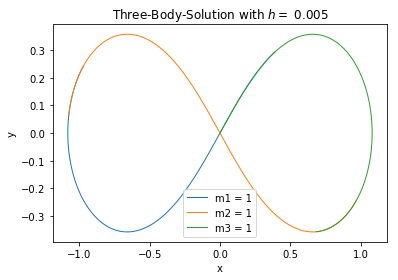

In [4]:
#Choose steps size h
h = 0.005

y, x = rk4(y0, 0, f, h, 500)

pos1_x = []
pos1_y = []
for i in range(len(y)):
    pos1_x.append(y[i][0])
    pos1_y.append(y[i][1])
    
pos2_x = []
pos2_y = []
for i in range(len(y)):
    pos2_x.append(y[i][4])
    pos2_y.append(y[i][5])
    
pos3_x = []
pos3_y = []
for i in range(len(y)):
    pos3_x.append(y[i][8])
    pos3_y.append(y[i][9])
    

#Plot trajectory
plt.title('Three-Body-Solution with $h =$ ' + str(h))
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.plot(pos1_x, pos1_y, linewidth=1.0, linestyle="-", label='m1 = 1')
plt.plot(pos2_x, pos2_y, linewidth=1.0, linestyle="-", label='m2 = 1')
plt.plot(pos3_x, pos3_y, linewidth=1.0, linestyle="-", label='m3 = 1')
plt.legend()
plt.show()

### b) Now consider a different problem. Choose the masses of the three bodies to be $m_1 = 3$, $m_2 = 4$ and $m_3 = 5$, and place them at the corners of a right triangle (one angle is $90^{\circ}$) with edge lengths of $l_1 = 3$, $l_2 = 4$ and $l_3 = 5$, such that $m_1$ is opposite to the edge $l_1$, $m_2$ opposite to $l_2$, and $m_3$ opposite to $l_3$. Set the initial velocities to zero. This is the Meissel-Burrau problem. We recommend to place the origin of your coordinate system into the center of mass of the system.

In [5]:
#Initial conditions
m1 = 3
m2 = 4
m3 = 5

#Initial conditions, place the origin of your coordinate system into the center of mass of the system
y1 = [-1, 3]
v1 = [0.0, 0.0]
y2 = [2, -1]
v2 = [0.0, 0.0]
y3 = [-1, -1]
v3 = [0.0, 0.0]

y0 = np.array(y1 + v1 + y2 + v2 + y3 + v3)

### Use the Runge-Kutta-4 integrator to follow the time evolution of the system until it dissolves. Record the points in time when two bodies have minimum separation and store this data in a file. Investigate the behavior of the system for different integration steps $h$, starting with $h = 0.1$. How small does $h$ need to be in order to obtain reliable estimates for the time of the first five closest encounters. 

In [6]:
#Choose step size h
h = 0.0001

y, x = rk4(y0, 0, f, h, 80000)

pos1_x = []
pos1_y = []
for i in range(len(y)):
    pos1_x.append(y[i][0])
    pos1_y.append(y[i][1])
    
pos2_x = []
pos2_y = []
for i in range(len(y)):
    pos2_x.append(y[i][4])
    pos2_y.append(y[i][5])
    
pos3_x = []
pos3_y = []
for i in range(len(y)):
    pos3_x.append(y[i][8])
    pos3_y.append(y[i][9])

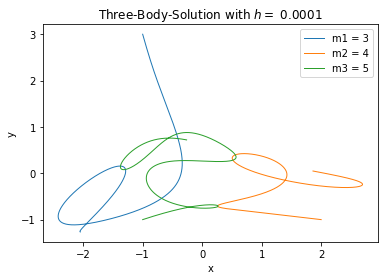

In [7]:
plt.title('Three-Body-Solution with $h =$ ' + str(h))
plt.xlabel(r'x')
plt.ylabel(r'y')
plt.plot(pos1_x, pos1_y, linewidth=1.0, linestyle="-", label='m1 = 3')
plt.plot(pos2_x, pos2_y, linewidth=1.0, linestyle="-", label='m2 = 4')
plt.plot(pos3_x, pos3_y, linewidth=1.0, linestyle="-", label='m3 = 5')
plt.legend()
plt.show()

In [8]:
##########################################################################################################

distance23 = []

for t in range(len(pos1_x)):
    distance = np.sqrt((pos2_x[t]-pos3_x[t])**2 + (pos2_y[t]-pos3_y[t])**2)
    distance23.append(distance)

index = distance23.index(min(distance23))
t = x[index]

print(t)
print(min(distance23))

#########################################################################################################

1.8793
0.0097873762765


### Plot for different step sizes $h$: 

In [9]:
#We choose the time steps
h1 = 0.1
h2 = 0.01
h3 = 0.001
h4 = 0.0001

### (i) the trajectories of the three bodies in the orbital plane.

In [10]:
#Solve for the coordinates of the masses for different step sizes and constant integration time T=8
def solve_for_position(h):
    y, x = rk4(y0, 0, f, h, int(8/h))

    pos1_x = []
    pos1_y = []
    for i in range(len(y)):
        pos1_x.append(y[i][0])
        pos1_y.append(y[i][1])
    
    pos2_x = []
    pos2_y = []
    for i in range(len(y)):
        pos2_x.append(y[i][4])
        pos2_y.append(y[i][5])
    
    pos3_x = []
    pos3_y = []
    for i in range(len(y)):
        pos3_x.append(y[i][8])
        pos3_y.append(y[i][9])
        
    return (pos1_x, pos1_y, pos2_x, pos2_y, pos3_x, pos3_y)


positions1 = solve_for_position(h1)
positions2 = solve_for_position(h2)
positions3 = solve_for_position(h3)
positions4 = solve_for_position(h4)

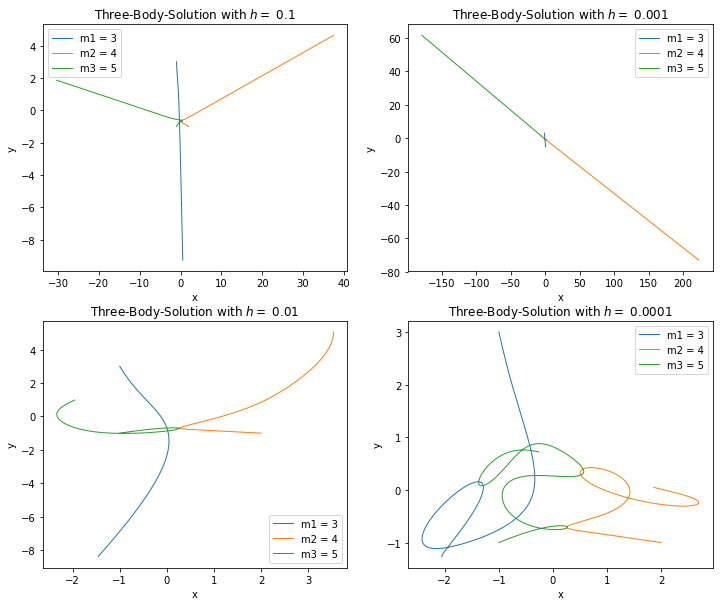

In [11]:
#Plot trajectories

fig, axs = plt.subplots(2, 2, figsize=(12,10))
axs[0,0].plot(positions1[0], positions1[1], linewidth=1.0, linestyle="-", label='m1 = 3')
axs[0,0].plot(positions1[2], positions1[3], linewidth=1.0, linestyle="-", label='m2 = 4')
axs[0,0].plot(positions1[4], positions1[5], linewidth=1.0, linestyle="-", label='m3 = 5')
axs[0,0].set_title('Three-Body-Solution with $h =$ ' + str(h1))
axs[0,0].legend()
axs[1,0].plot(positions2[0], positions2[1], linewidth=1.0, linestyle="-", label='m1 = 3')
axs[1,0].plot(positions2[2], positions2[3], linewidth=1.0, linestyle="-", label='m2 = 4')
axs[1,0].plot(positions2[4], positions2[5], linewidth=1.0, linestyle="-", label='m3 = 5')
axs[1,0].set_title('Three-Body-Solution with $h =$ ' + str(h2))
axs[1,0].legend()
axs[0,1].plot(positions3[0], positions3[1], linewidth=1.0, linestyle="-", label='m1 = 3')
axs[0,1].plot(positions3[2], positions3[3], linewidth=1.0, linestyle="-", label='m2 = 4')
axs[0,1].plot(positions3[4], positions3[5], linewidth=1.0, linestyle="-", label='m3 = 5')
axs[0,1].set_title('Three-Body-Solution with $h =$ ' + str(h3))
axs[0,1].legend()
axs[1,1].plot(positions4[0], positions4[1], linewidth=1.0, linestyle="-", label='m1 = 3')
axs[1,1].plot(positions4[2], positions4[3], linewidth=1.0, linestyle="-", label='m2 = 4')
axs[1,1].plot(positions4[4], positions4[5], linewidth=1.0, linestyle="-", label='m3 = 5')
axs[1,1].set_title('Three-Body-Solution with $h =$ ' + str(h4))
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')

### (ii) the mutual distances of the three bodies in logarithmic scaling as function of time (linear).

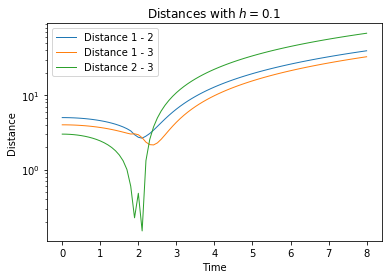

In [12]:
#Distance between m1 and m2
distance12 = []
for t in range(len(positions1[0])):
    distance = np.sqrt((positions1[0][t]-positions1[2][t])**2 + (positions1[1][t]-positions1[3][t])**2)
    distance12.append(distance)
    
#Distance between m1 and m3
distance13 = []
for t in range(len(positions1[0])):
    distance = np.sqrt((positions1[0][t]-positions1[4][t])**2 + (positions1[1][t]-positions1[5][t])**2)
    distance13.append(distance)
    
#Distance between m2 and m3
distance23 = []
for t in range(len(positions1[0])):
    distance = np.sqrt((positions1[2][t]-positions1[4][t])**2 + (positions1[3][t]-positions1[5][t])**2)
    distance23.append(distance)

x1 = rk4(y0, 0, f, h1, int(8/h1))[1]
    
plt.title('Distances with $h =$' + str(h1))
plt.xlabel(r'Time')
plt.ylabel(r'Distance')
plt.plot(x1, distance12, linewidth=1.0, linestyle="-", label='Distance 1 - 2')
plt.plot(x1, distance13, linewidth=1.0, linestyle="-", label='Distance 1 - 3')
plt.plot(x1, distance23, linewidth=1.0, linestyle="-", label='Distance 2 - 3')
plt.yscale('log')
plt.legend()
plt.show()

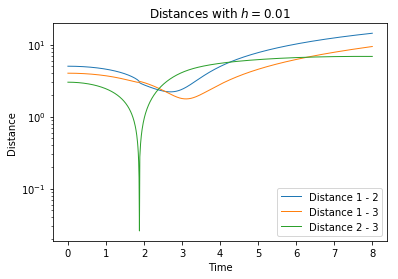

In [13]:
#Distance between m1 and m2
distance12 = []
for t in range(len(positions2[0])):
    distance = np.sqrt((positions2[0][t]-positions2[2][t])**2 + (positions2[1][t]-positions2[3][t])**2)
    distance12.append(distance)
    
#Distance between m1 and m3
distance13 = []
for t in range(len(positions2[0])):
    distance = np.sqrt((positions2[0][t]-positions2[4][t])**2 + (positions2[1][t]-positions2[5][t])**2)
    distance13.append(distance)
    
#Distance between m2 and m3
distance23 = []
for t in range(len(positions2[0])):
    distance = np.sqrt((positions2[2][t]-positions2[4][t])**2 + (positions2[3][t]-positions2[5][t])**2)
    distance23.append(distance)

x2 = rk4(y0, 0, f, h2, int(8/h2))[1]
    
plt.title('Distances with $h =$' + str(h2))
plt.xlabel(r'Time')
plt.ylabel(r'Distance')
plt.plot(x2, distance12, linewidth=1.0, linestyle="-", label='Distance 1 - 2')
plt.plot(x2, distance13, linewidth=1.0, linestyle="-", label='Distance 1 - 3')
plt.plot(x2, distance23, linewidth=1.0, linestyle="-", label='Distance 2 - 3')
plt.yscale('log')
plt.legend()
plt.show()

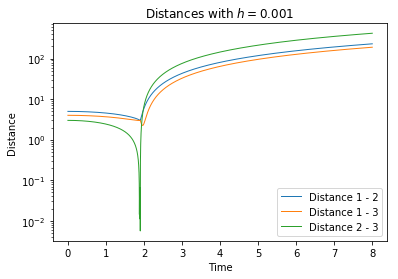

In [14]:
#Distance between m1 and m2
distance12 = []
for t in range(len(positions3[0])):
    distance = np.sqrt((positions3[0][t]-positions3[2][t])**2 + (positions3[1][t]-positions3[3][t])**2)
    distance12.append(distance)
    
#Distance between m1 and m3
distance13 = []
for t in range(len(positions3[0])):
    distance = np.sqrt((positions3[0][t]-positions3[4][t])**2 + (positions3[1][t]-positions3[5][t])**2)
    distance13.append(distance)
    
#Distance between m2 and m3
distance23 = []
for t in range(len(positions3[0])):
    distance = np.sqrt((positions3[2][t]-positions3[4][t])**2 + (positions3[3][t]-positions3[5][t])**2)
    distance23.append(distance)

x3 = rk4(y0, 0, f, h3, int(8/h3))[1]
    
plt.title('Distances with $h =$' + str(h3))
plt.xlabel(r'Time')
plt.ylabel(r'Distance')
plt.plot(x3, distance12, linewidth=1.0, linestyle="-", label='Distance 1 - 2')
plt.plot(x3, distance13, linewidth=1.0, linestyle="-", label='Distance 1 - 3')
plt.plot(x3, distance23, linewidth=1.0, linestyle="-", label='Distance 2 - 3')
plt.yscale('log')
plt.legend()
plt.show()

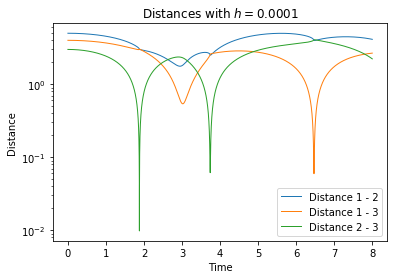

In [15]:
#Distance between m1 and m2
distance12 = []
for t in range(len(positions4[0])):
    distance = np.sqrt((positions4[0][t]-positions4[2][t])**2 + (positions4[1][t]-positions4[3][t])**2)
    distance12.append(distance)
    
#Distance between m1 and m3
distance13 = []
for t in range(len(positions4[0])):
    distance = np.sqrt((positions4[0][t]-positions4[4][t])**2 + (positions4[1][t]-positions4[5][t])**2)
    distance13.append(distance)
    
#Distance between m2 and m3
distance23 = []
for t in range(len(positions4[0])):
    distance = np.sqrt((positions4[2][t]-positions4[4][t])**2 + (positions4[3][t]-positions4[5][t])**2)
    distance23.append(distance)

x4 = rk4(y0, 0, f, h4, int(8/h4))[1]
    
plt.title('Distances with $h =$' + str(h4))
plt.xlabel(r'Time')
plt.ylabel(r'Distance')
plt.plot(x4, distance12, linewidth=1.0, linestyle="-", label='Distance 1 - 2')
plt.plot(x4, distance13, linewidth=1.0, linestyle="-", label='Distance 1 - 3')
plt.plot(x4, distance23, linewidth=1.0, linestyle="-", label='Distance 2 - 3')
plt.yscale('log')
plt.legend()
plt.show()

### (iii) the error of the total energy of the system in logarithmic scaling as function of time (linear).

In [16]:
#Didn't had so much time